<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter10SamplingStrategy/frameMultiplexing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding for Frame Multiplexing
## David Brady
## University of Arizona
## December 2023

This notebook illustrates a simple example of multiframe multiplexing using a spatial code.

## libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage
from skimage import io
from skimage import transform
from skimage import filters
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
import cv2




## Test Image

In [2]:
camera=skimage.data.camera()

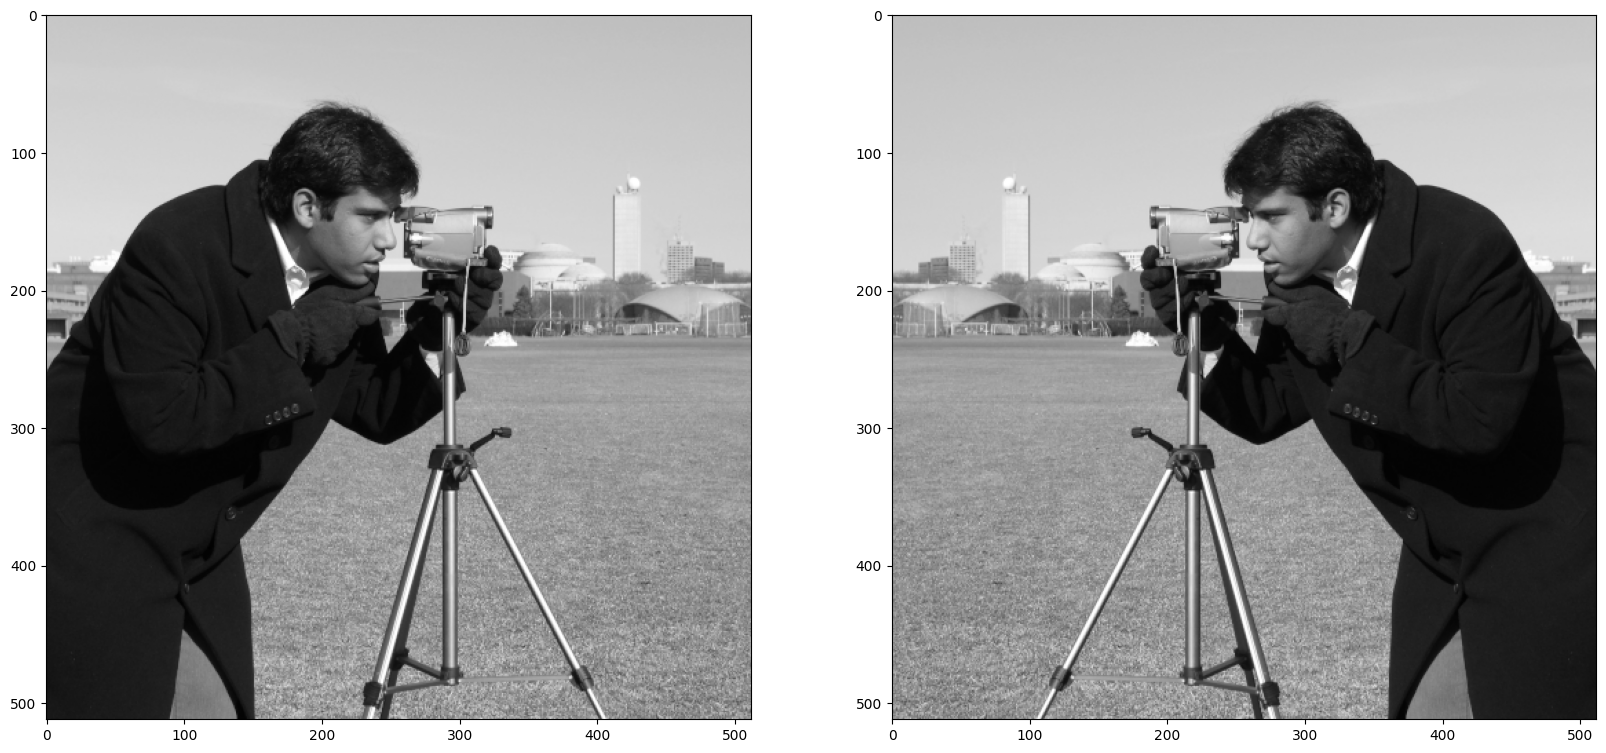

In [3]:
plt.subplot(1,2,1)
plt.imshow(camera, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.flip(camera,axis=1), cmap='gray')

In [4]:
code1=np.random.randint(2, size=(camera.shape[0], camera.shape[1]))
code2=np.random.randint(2, size=(camera.shape[0], camera.shape[1]))

In [5]:
g=code1*camera+code2*np.flip(camera,axis=1)

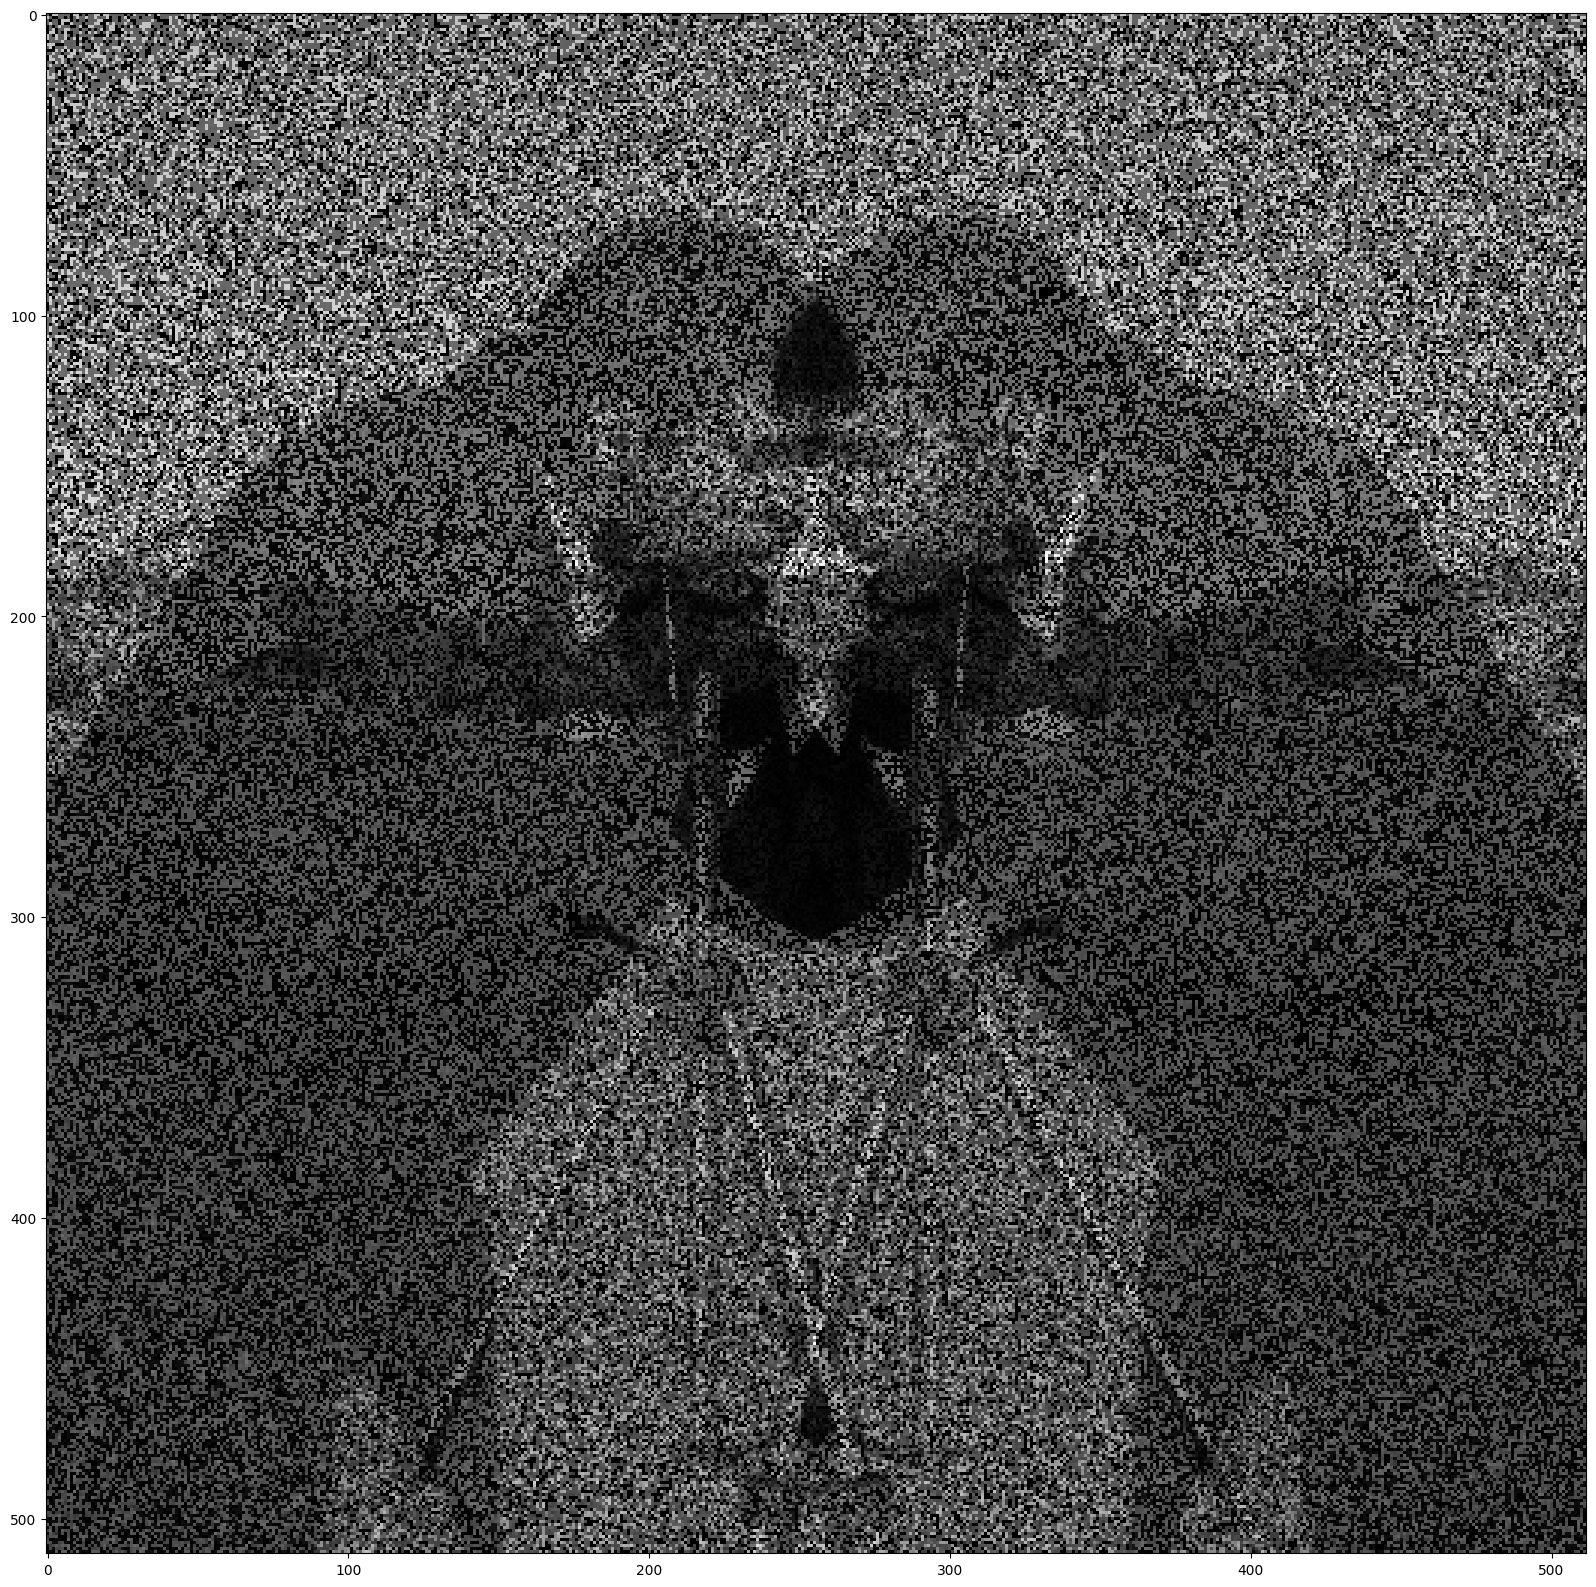

In [6]:
plt.imshow(g, cmap='gray')

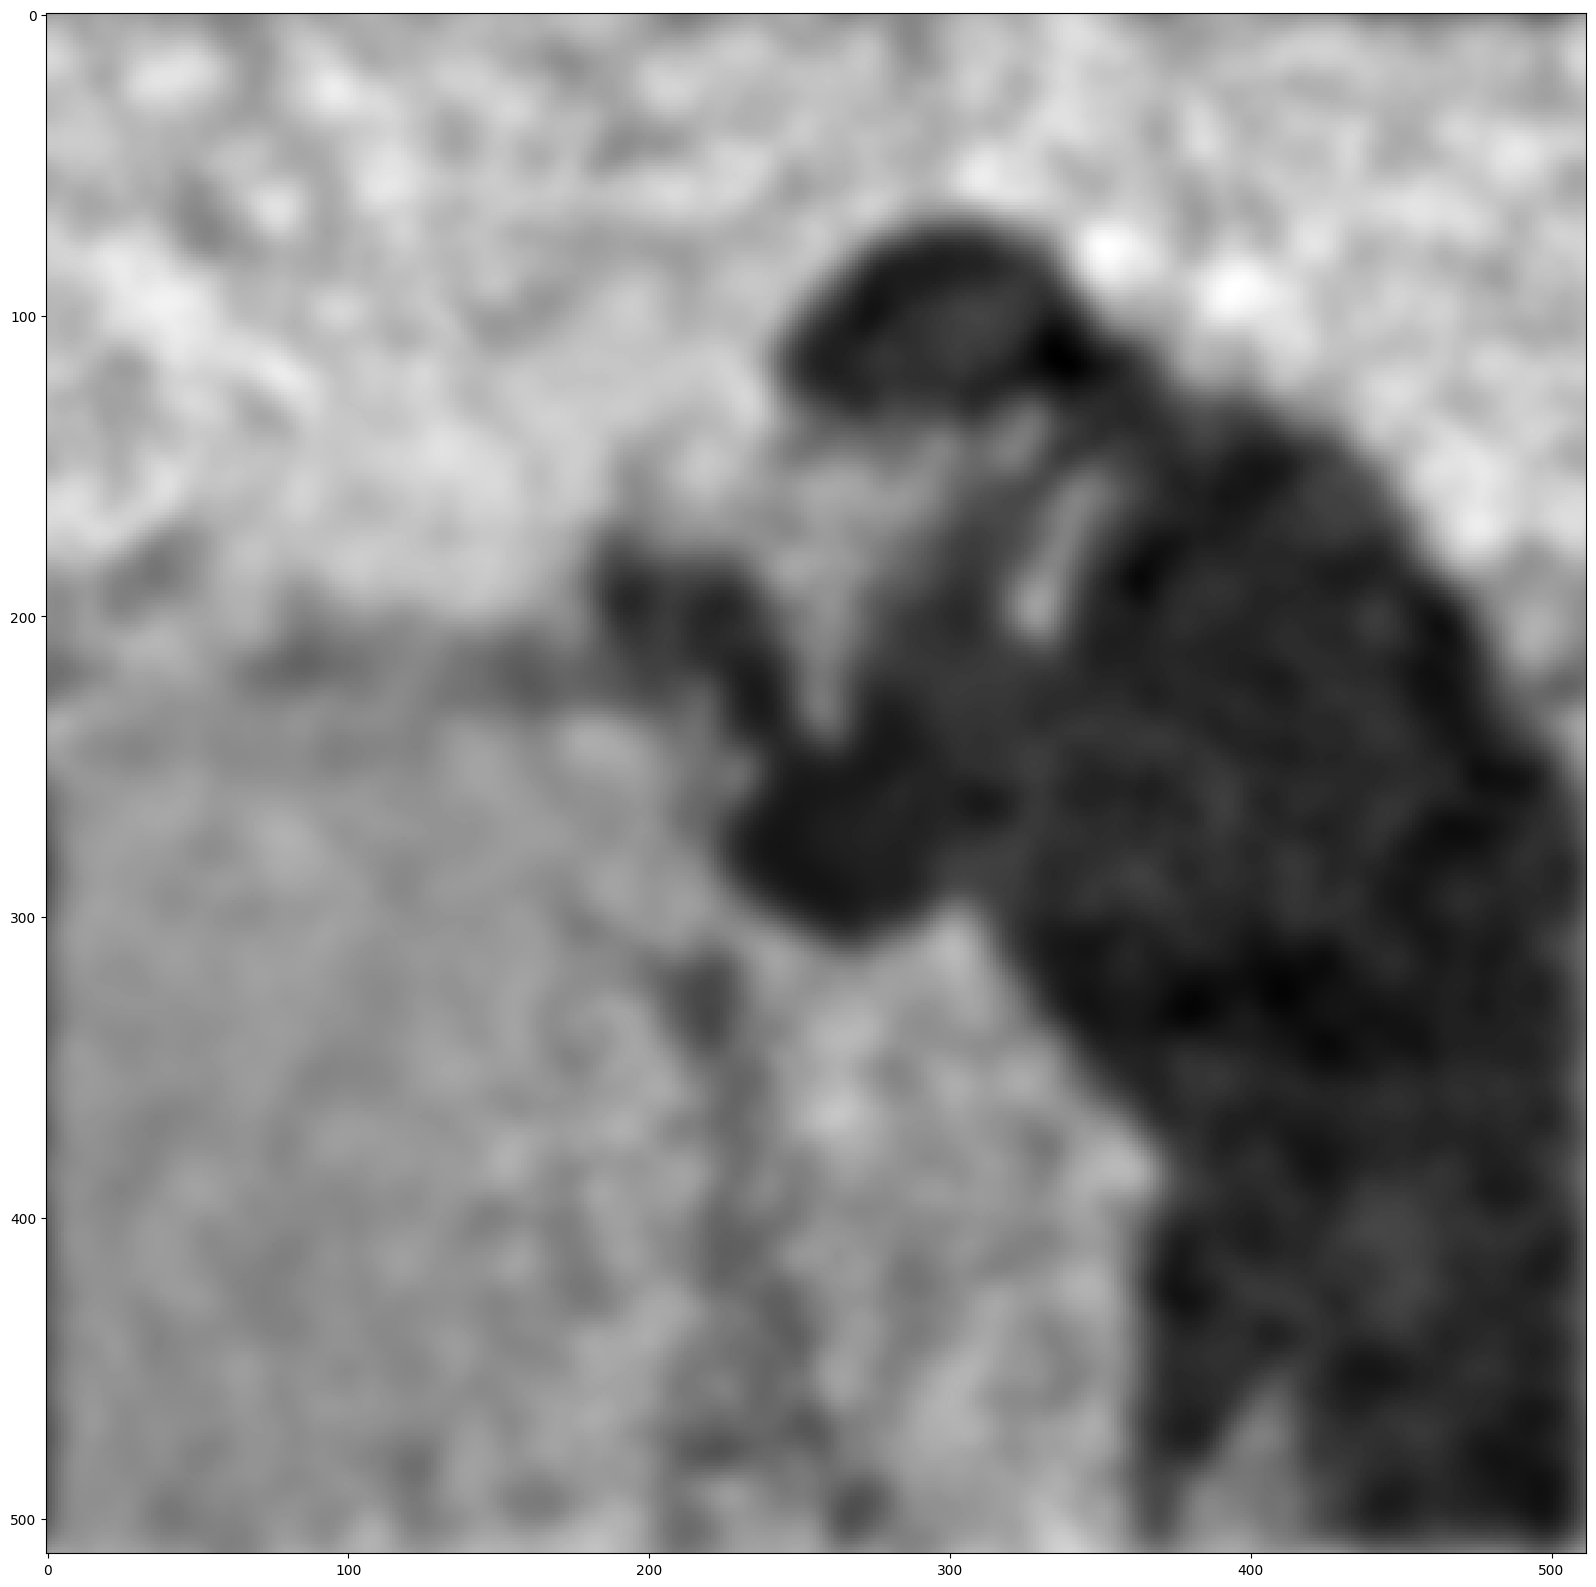

In [7]:
plt.imshow(filters.butterworth((code2-.5)*g,cutoff_frequency_ratio=0.03,high_pass=False), cmap='gray')

In [8]:
np.min(code1)

np.int64(0)

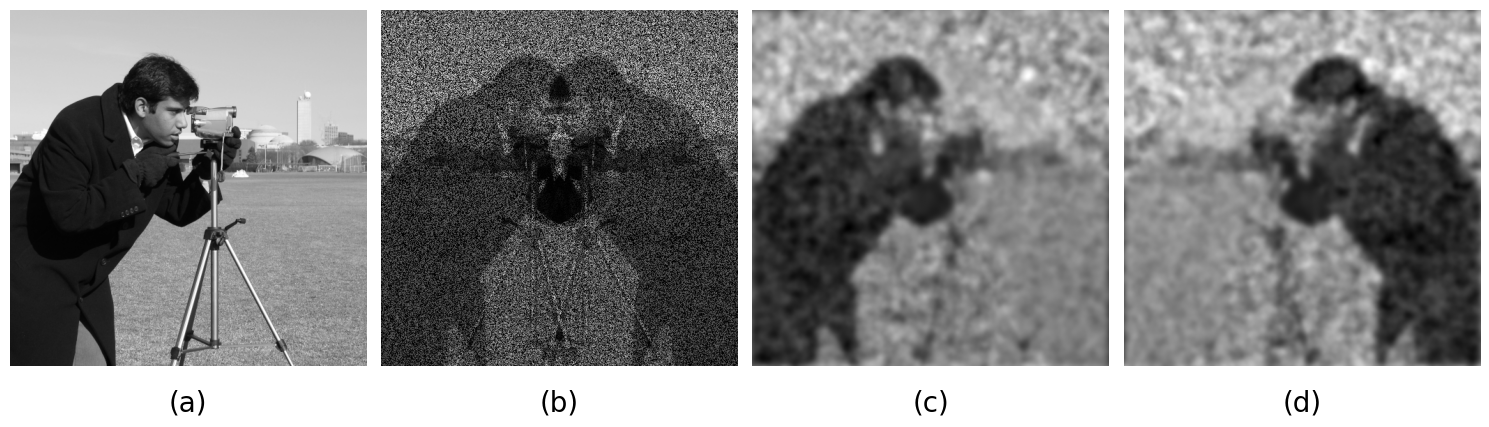

In [16]:
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
plt.imshow(camera, cmap='gray')
plt.axis('off')
plt.title('(a)', y=-0.15, fontsize=20)
plt.subplot(1,4,2)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.title('(b)', y=-0.15, fontsize=20)
plt.subplot(1,4,3)
plt.imshow(filters.butterworth((code1-.5)*g,cutoff_frequency_ratio=0.04,high_pass=False), cmap='gray')
plt.axis('off')
plt.title('(c)', y=-0.15, fontsize=20)
plt.subplot(1,4,4)
plt.imshow(filters.butterworth((code2-.5)*g,cutoff_frequency_ratio=0.04,high_pass=False), cmap='gray')
plt.axis('off')
plt.title('(d)', y=-0.15, fontsize=20)
plt.tight_layout()
plt.savefig('multiplexCamera.pdf')